# Использование вложенных классов vs композиция и наследование

## Преамбула

При написании интерфейса через `kivy`-библиотеку всю верстку можно писать не только декларативно (отдельный kv файл), но и через создание классов нужных лейаутов, виджетов и т.п. в коде и вызовов соответсвующих методов.

In [3]:
from kivy.app import App
from kivy.core.window import Window
from kivy.uix.gridlayout import GridLayout
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.button import Button
from kivy.uix.label import Label


Window.size = (250, 350)

class Calculator2(App):

    def build(self):

        bl = BoxLayout(orientation="vertical", padding=25)  # главный слой, в который вкладывается виджет с лейблом и
        # и слой GridLayout с кнопками

        gl = GridLayout(cols=4, spacing=3)  # слой GridLayout для кнопок

        bl.add_widget(Label(text="0", font_size=40, size_hint=(1, .4)))  # вкладываем лейбл в главный слой наверех
        # т.к. метод add_widget вызван у экземпляра класса BoxLayout, то Label будет вложенным
        # классом, наследующий методы родительсткого класса

        buttons = [str(i) for i in range(10)]+["=", "+", "."] # создаем кнопки

        for i in buttons: # вкладываем кнопки в слой GridLayout
            gl.add_widget(Button(text=f"{i}"))

        bl.add_widget(gl)  # вкладываем слой GridLayout после Label в главный BoxLayout

        return bl

Calculator2().run()

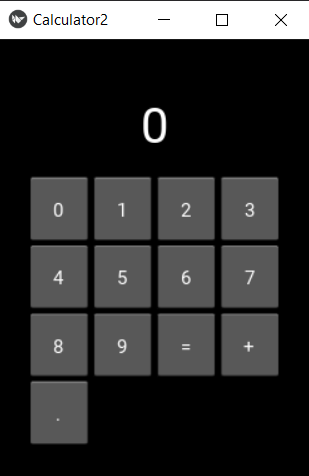

Тут обратим внимание, что у класса `Label` нет атрибута `size_hint`, мы получаем возможность управлять размером виджета после вызова метода `add_widget` (вложения в лейаут):

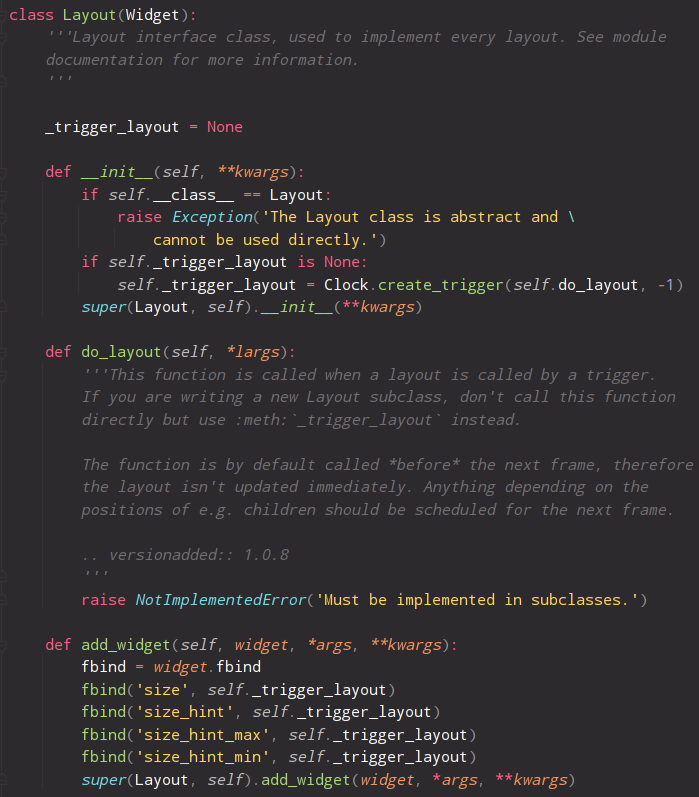

Какое отношение в данном случае у классов `Widget` и `Layout`? Судя по методу `add_widget` эти классы остаются "независимыми", т.е. используется **композиция** или **аггрегация** двух классов. 

Хотя если смотреть на то, как виджеты вкладываются в лейаут, кажется, что виджет является **дочерним** (используется **наследование**) или **вложенным** (какой ООП подход использует вложенные классы?) классом для лейаута. Возник вопрос: а где использутся вложенные классы и в каком случае лучше использовать их вместо наследования?

## Создание и управление вложенным классом

Ну, во-первых, это точно не вложенный класс. Вложенный класс не наследует атрибуты внешнего класса. К атрибутам вложенного класса мы обращаемся только через внешний класс. То есть создать экземпляр вложенного класса без создания экземпяра внешнего класса нельзя.

In [3]:
class Student:
    def __init__(self, name):
        self.name = name
        self.laptop = self.StudLap() # экземпляр класса StudLap(). Т.к. он вложен в класс Student(), доступ к нему через self 
        
    def show(self):
        print(f"Student {self.name} have laptop {self.laptop.brand}")
        
    class StudLap:
        def __init__(self):
            self.brand = "HP"
            self.cpu = "Core i7"
            
s1 = Student("Kate")
s1.show()
print(s1.laptop.cpu)

Student Kate have laptop HP
Core i7


In [6]:
print(s1.laptop.name)

AttributeError: 'StudLap' object has no attribute 'name'

Исходя из этого, можно сделать вывод, что вложенный класс можно использовать в следующих случаях:
1. Запрещать создавать экземпляры от этого класса напрямую
2. Организовать код так, чтобы он не мешался - если, допустим, класс `Engine` всегда неизменен и не существует в отрыве от класса `Car`, то его можно вложить в класс `Car`. (Если же разные разные экземпляры `Car` используют разные экзмепляры `Engine` с изменяемыми атрибутами, то лучше конечно использовать **композицию** или **аггрегацию**. <span style="font-size: 80%; font-style: italic;">Наследование тут вообще нельзя применять, потому что ни машина не является экземпляром двигателя (одной из вариантов двигателя), ни двигатель не является одним из вариантов машины. Наследование можно использовать для обобщения: транспорт -> [водный (-> корабль)] и [наземный (-> машина)]</span>

Первую особенность используется в паттерне проектирования <b style="font-size: 110%">Синглтон</b>

## Singleton с использованием абстрактных базовых классов (ABC)

*Как работает, когда используется вместо других порождающих шаблонов, зачем использовать, зачем abc и т.п. см Notion*

In [ ]:
from abc import ABCMeta, abstractmethod

class InterfacePerson(metaclass=ABCMeta):
    
    @abstractmethod
    def get_data(): 
        """ Implement in child class """
        
class PersonSingleton(IPerson):
    __instance = None
    
    @staticmethod
    def get_instance():
        if PersonSingleton.__instance = None
        
        

## Singleton через переопределение метода `__new__()`

In [1]:
class Singleton:
    _instance = None

    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            cls._instance = super().__new__(cls, *args, **kwargs)
        return cls._instance